# Import Libraries and Define Auxiliary Functions

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Exploratory Data Analysis

In [2]:
import requests
import io

# URL of the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the dataset
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Read the dataset into a DataFrame
    dataset_part_2_csv = io.BytesIO(response.content)
    df = pd.read_csv(dataset_part_2_csv)
    print(df.head(5))
else:
    print(f"Failed to fetch the dataset. Status code: {response.status_code}")


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

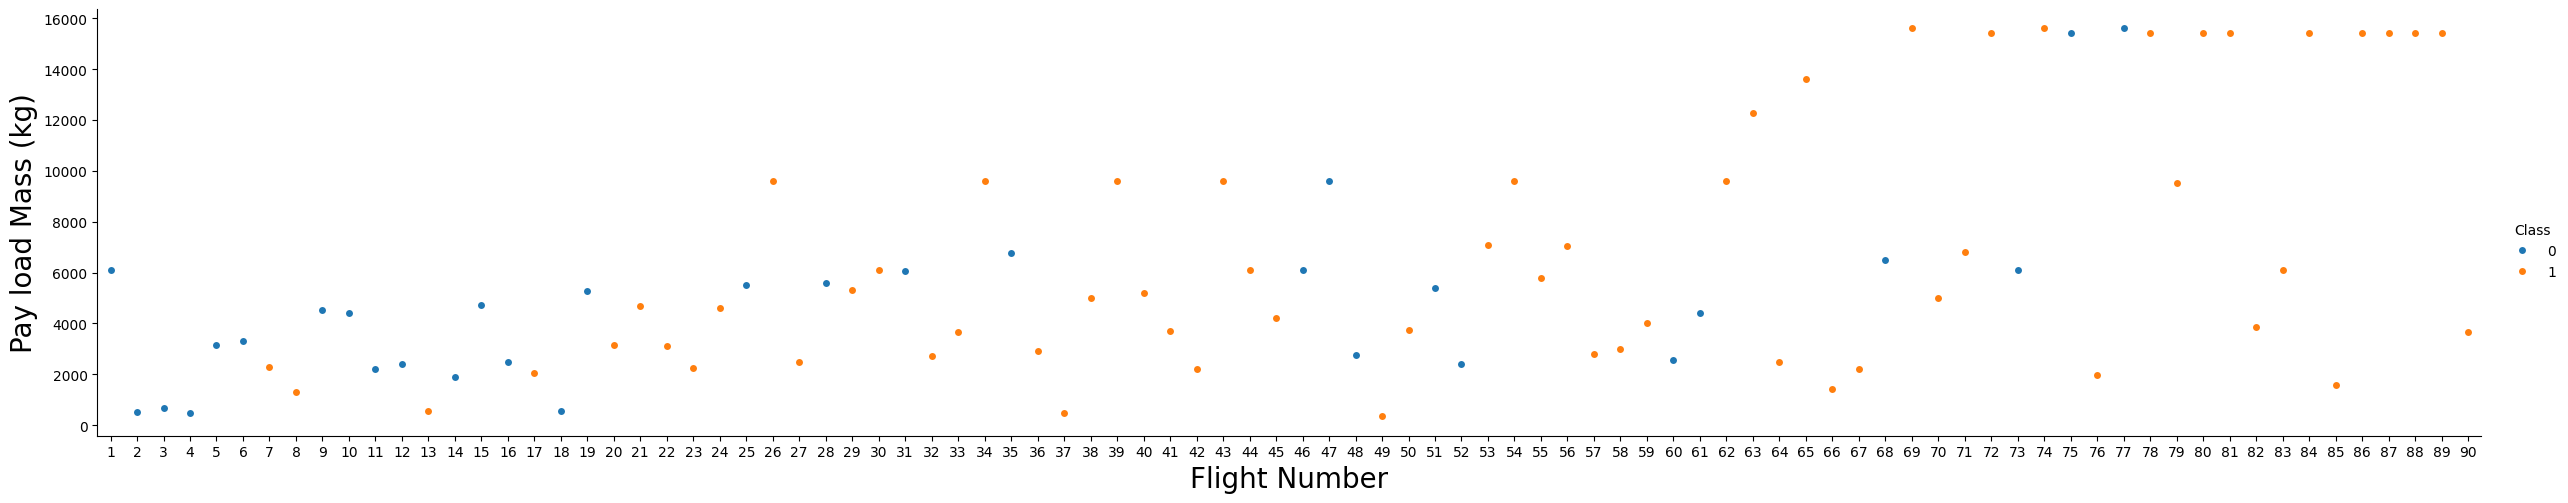

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## TASK 1: Visualize the relationship between Flight Number and Launch Site

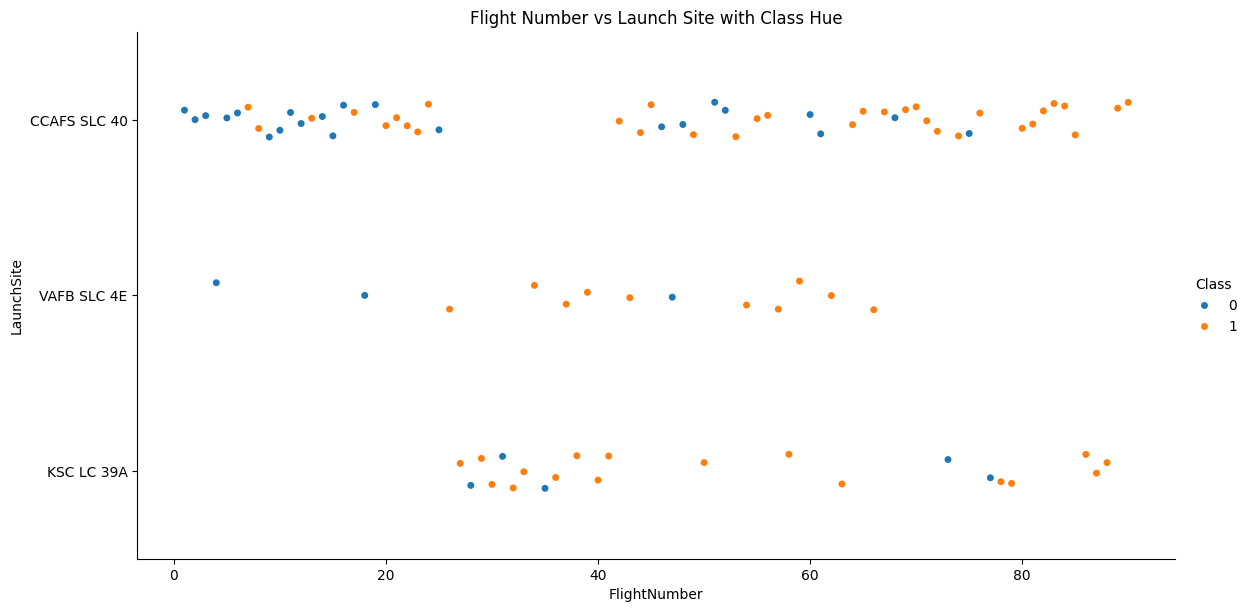

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    kind='strip',
    height=6,
    aspect=2
)

plt.title('Flight Number vs Launch Site with Class Hue')
plt.show()


As flight number increases so does the success rate.

## TASK 2: Visualize the relationship between Payload Mass and Launch Site¶

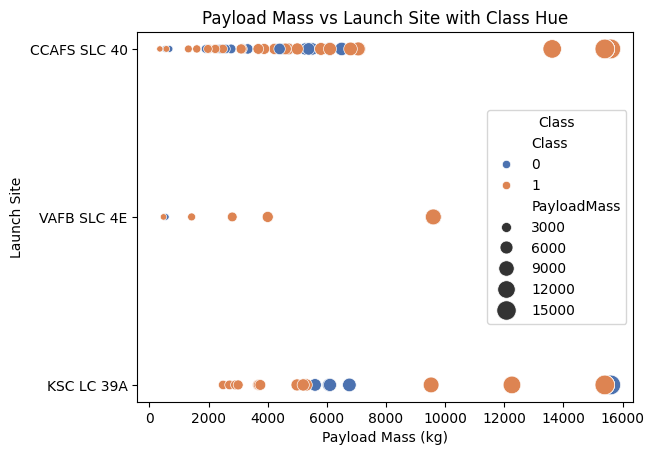

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class',
    palette='deep',
    size='PayloadMass',  # Optional, size the points by payload mass
    sizes=(20, 200),  # Range of point sizes
    marker='o',  # Shape of the points
)

plt.title('Payload Mass vs Launch Site with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.legend(title='Class')
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).



## TASK 3: Visualize the relationship between success rate of each orbit type

<ipython-input-6-2e584c81d3cb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=success_rate_by_orbit, palette='viridis')


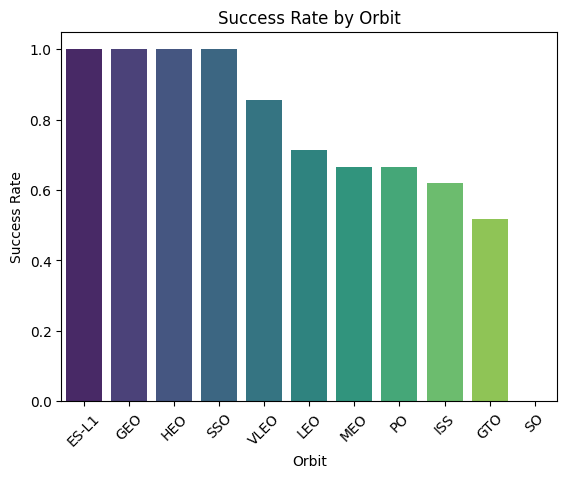

In [6]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Group by 'Orbit' and calculate the mean of 'class' (which represents success rate)
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Sort the DataFrame by 'Class' in descending order
success_rate_by_orbit = success_rate_by_orbit.sort_values(by='Class', ascending=False)

# Create a bar chart using seaborn
sns.barplot(x='Orbit', y='Class', data=success_rate_by_orbit, palette='viridis')

# Adding labels and title
plt.title('Success Rate by Orbit')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



## TASK 4: Visualize the relationship between FlightNumber and Orbit type

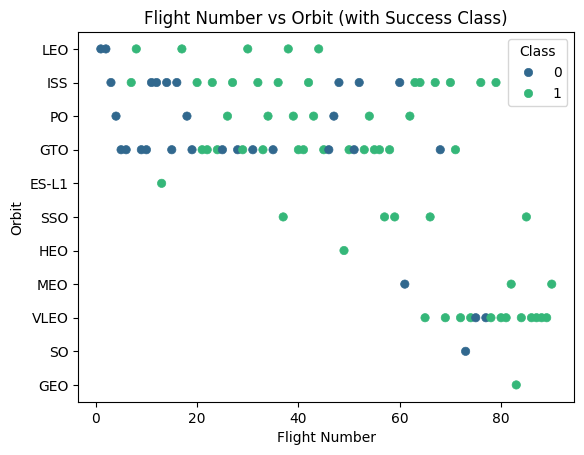

In [7]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Create a scatter plot using seaborn
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='viridis', edgecolor=None)

# Adding labels and title
plt.title('Flight Number vs Orbit (with Success Class)')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')

# Show the plot
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

## TASK 5: Visualize the relationship between Payload Mass and Orbit type

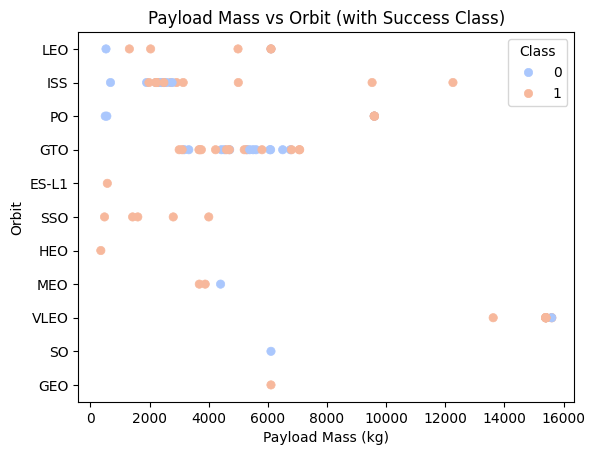

In [8]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

# Create a scatter plot using seaborn
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='coolwarm', edgecolor=None)

# Adding labels and title
plt.title('Payload Mass vs Orbit (with Success Class)')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show the plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

## TASK 6: Visualize the launch success yearly trend

In [9]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [10]:
df.dtypes

,0
FlightNumber,int64
Date,object
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


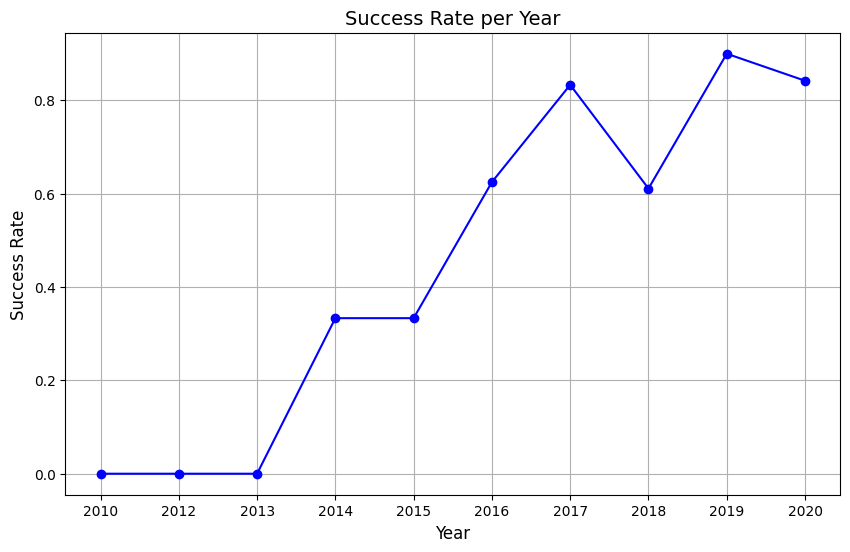

In [11]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# Group the data by the extracted 'Date' (which now contains the year) and calculate the mean success rate (class)
success_rate_per_year = df.groupby('Date')['Class'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(success_rate_per_year.index, success_rate_per_year.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Success Rate per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020

# Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


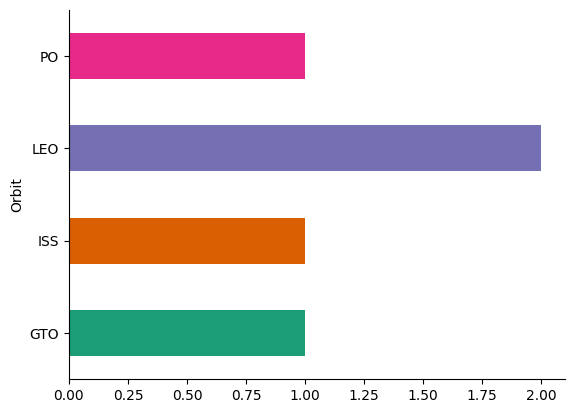

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Orbit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## TASK 7: Create dummy variables to categorical columns

In [13]:
# HINT: Use get_dummies() function on the categorical columns

# Apply OneHotEncoder using get_dummies on specific columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=False)

# Display the first few rows of the dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
